<a href="https://colab.research.google.com/github/Sameeksha288/Loan-Prediction-System/blob/main/Loan_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1) (1).csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
avg_income = df["ApplicantIncome"].mean()
print ("The average income of the applicant of this dataset is {:.1f}.".format(avg_income))

The average income of the applicant of this dataset is 5403.5.


In [ ]:
avg_loan_amount = df["LoanAmount"].mean()
print ("The average loan amount of the applicant of this dataset is {:.1f}.".format(avg_income))

The average loan amount of the applicant of this dataset is 5403.5.


In [ ]:
# handling categorical values
#GENDER
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
#MARRIED
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [ ]:
#DEPENDENT
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [ ]:
#EDUCATION
df['Education'].fillna(df['Education'].mode()[0], inplace=True)

In [ ]:
#SELF EMPLOYED
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [ ]:
#LOAN AMOUNT TERM
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
# CREDIT HISTORY
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#DATA VISUALIZATION

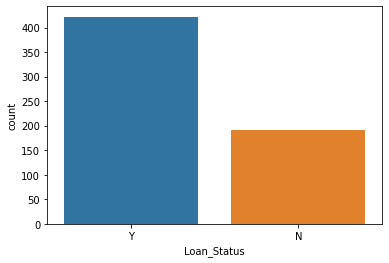

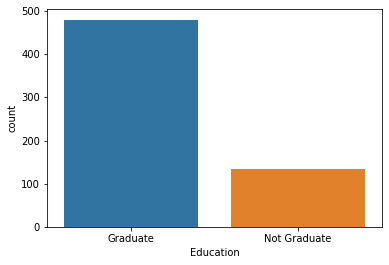

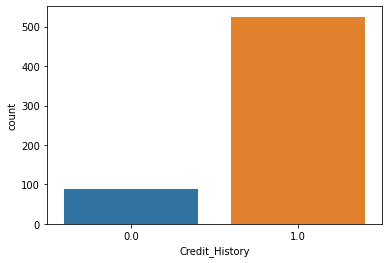

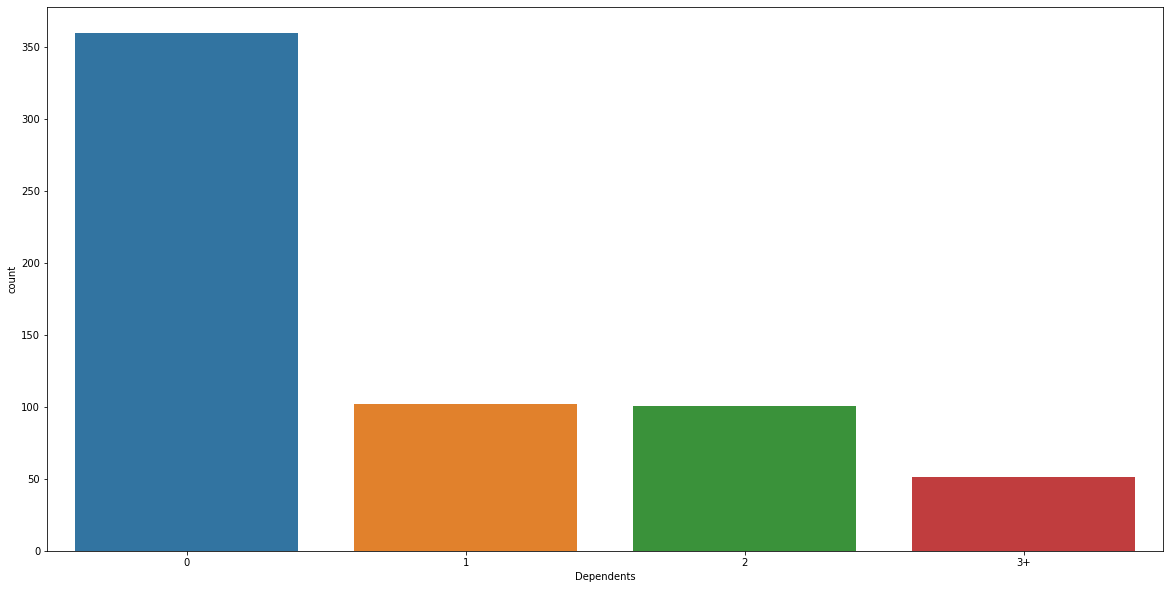

In [ ]:
sns.countplot(x=df["Loan_Status"])
plt.show()

sns.countplot(x=df["Education"])
plt.show()

sns.countplot(x=df["Credit_History"])
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x=df["Dependents"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


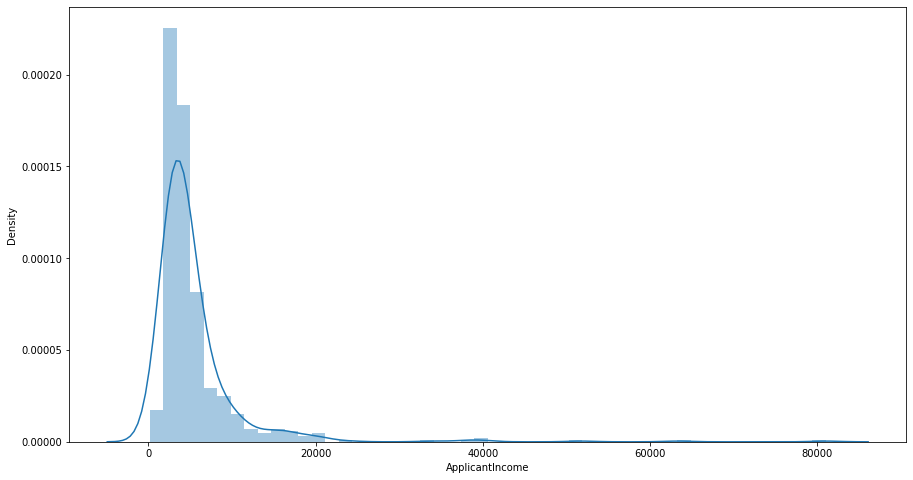

In [ ]:
# distribution of the income
plt.figure(figsize=(15,8))
sns.distplot(df["ApplicantIncome"])
plt.show()

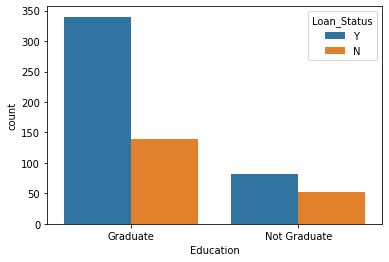

In [ ]:
# education and loan status
sns.countplot(x='Education', hue='Loan_Status', data=df)

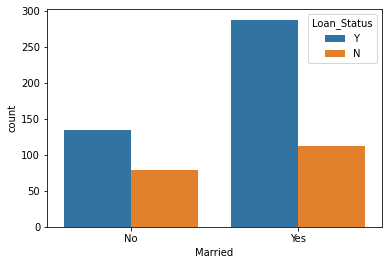

In [ ]:
# marital status & loan status
sns.countplot(x='Married', hue='Loan_Status',data=df)

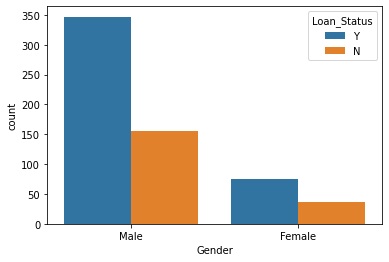

In [ ]:
# gender status & loan status
sns.countplot(x='Gender', hue='Loan_Status',data=df)

In [ ]:
#  outliers in LoanAmount column, imputed the missing values with median as median doesn't have any effect on outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [ ]:
df.isnull().sum()   #no null values now

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#HANDLING CATEGORICAL DATA
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Married'] = df['Married'].map({'No':0, 'Yes':1})
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1})
df['Credit_History'] = df['Credit_History'].map({1.0:1, 0.0:0})
df['Property_Area'] = df['Property_Area'].map({'Rural':0, 'Semiurban':1, 'Urban':2})
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})

In [ ]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1,2,1
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1,2,1
7,LP001014,0,1,3,1,0,3036,2504.0,158.0,360.0,0,1,0
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,360.0,1,2,1
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,360.0,1,1,0


In [ ]:
# 2 dataframes: one with loans and one without loans
loans = df[df['Loan_Status'] == 1].copy()
no_loans = df[df['Loan_Status'] == 0].copy()

In [ ]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,422.0,0.177725,0.382735,0.0,0.0,0.0,0.00,1.0
Married,422.0,0.682464,0.466070,0.0,0.0,1.0,1.00,1.0
Dependents,422.0,0.751185,1.009309,0.0,0.0,0.0,2.00,3.0
Education,422.0,0.805687,0.396140,0.0,1.0,1.0,1.00,1.0
Self_Employed,422.0,0.132701,0.339654,0.0,0.0,0.0,0.00,1.0
ApplicantIncome,422.0,5384.068720,5765.441615,210.0,2877.5,3812.5,5771.50,63337.0
CoapplicantIncome,422.0,1504.516398,1924.754855,0.0,0.0,1239.5,2297.25,20000.0
LoanAmount,422.0,143.869668,84.400468,17.0,100.0,128.0,160.00,700.0
Loan_Amount_Term,422.0,341.431280,62.697242,12.0,360.0,360.0,360.00,480.0
Credit_History,422.0,0.983412,0.127872,0.0,1.0,1.0,1.00,1.0


In [ ]:
no_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,192.0,0.192708,0.395457,0.0,0.00,0.0,0.00,1.0
Married,192.0,0.588542,0.493384,0.0,0.00,1.0,1.00,1.0
Dependents,192.0,0.729167,1.012789,0.0,0.00,0.0,1.00,3.0
Education,192.0,0.729167,0.445552,0.0,0.00,1.0,1.00,1.0
Self_Employed,192.0,0.135417,0.343063,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,192.0,5446.078125,6819.558528,150.0,2885.00,3833.5,5861.25,81000.0
CoapplicantIncome,192.0,1877.807292,4384.060103,0.0,0.00,268.0,2273.75,41667.0
LoanAmount,192.0,149.890625,83.529056,9.0,102.75,128.0,173.00,570.0
Loan_Amount_Term,192.0,344.562500,68.199402,36.0,360.00,360.0,360.00,480.0
Credit_History,192.0,0.572917,0.495948,0.0,0.00,1.0,1.00,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


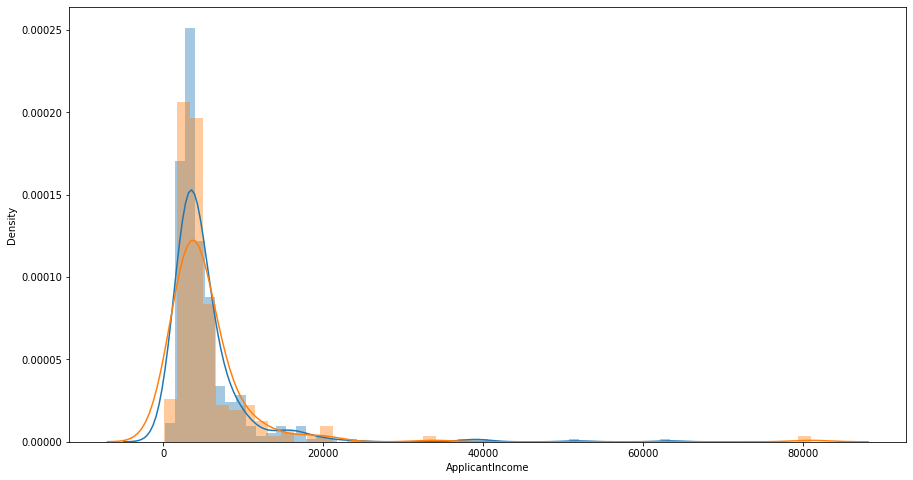

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(loans["ApplicantIncome"])
sns.distplot(no_loans["ApplicantIncome"])
plt.show()

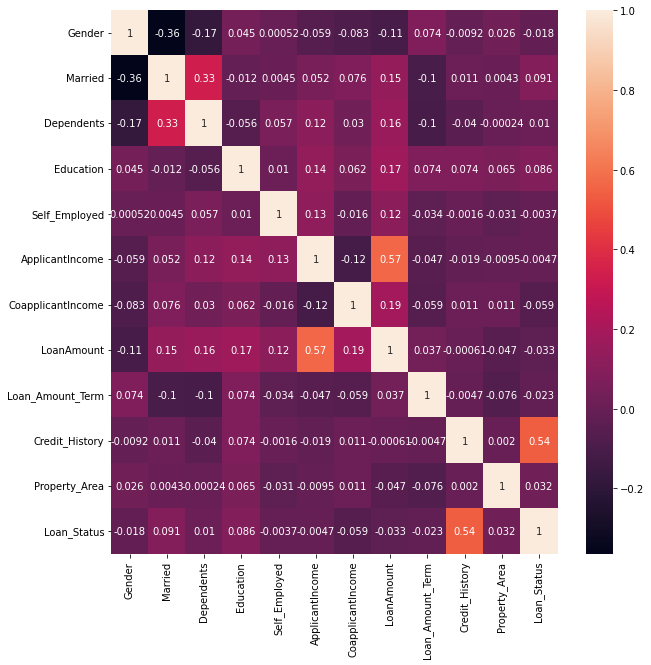

In [ ]:
cm = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


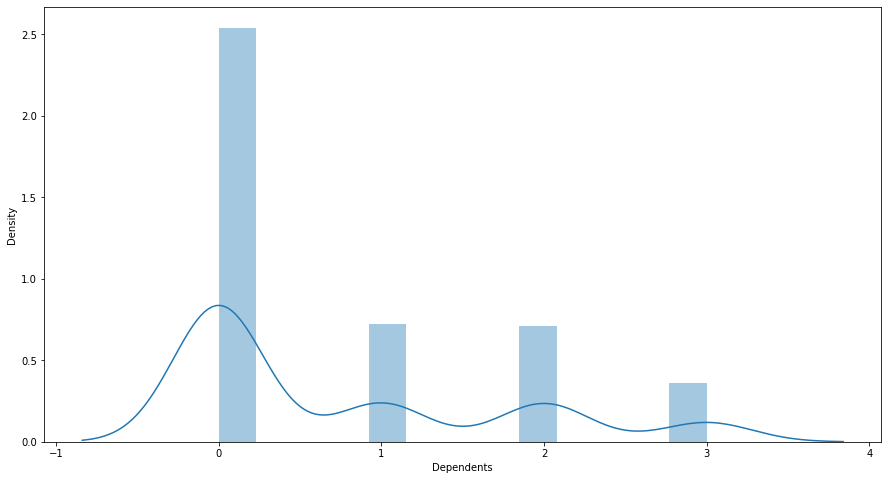

In [ ]:
# distribution of dependents
plt.figure(figsize=(15,8))
sns.distplot(df["Dependents"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


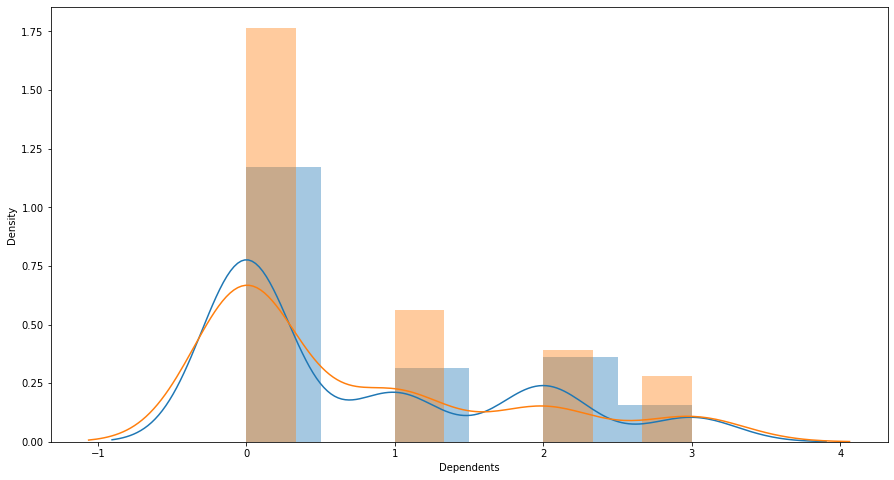

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(loans["Dependents"])
sns.distplot(no_loans["Dependents"])
plt.show()

In [ ]:
#DATA PREPARATION

In [ ]:
from tensorflow.keras.utils import to_categorical

X = df.drop(columns=["Loan_ID", "Loan_Status"])
y = df["Loan_Status"]
y = to_categorical(y)    #returns binary repreesentation of inputs

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=12)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((552, 11), (62, 11), (552, 2), (62, 2))

In [ ]:
# sequential model
model = keras.Sequential()

# adding dense layer
model.add(Dense(250, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='linear'))
model.add(Dropout(0.4))
#adding dense layer with softmax activation/output layer
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3000      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

In [ ]:
#COMPILATION AND TRAINING

In [ ]:
# custom functions for f1, precision and recall

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 22ms/step - loss: 0.5913 - f1_m: 0.7422 - val_loss: 0.6037 - val_f1_m: 0.7398
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5149 - f1_m: 0.8033 - val_loss: 0.7087 - val_f1_m: 0.7496
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4852 - f1_m: 0.8123 - val_loss: 0.5751 - val_f1_m: 0.7526
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4523 - f1_m: 0.8201 - val_loss: 0.5441 - val_f1_m: 0.7526
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4299 - f1_m: 0.8401 - val_loss: 0.5700 - val_f1_m: 0.7281
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4450 - f1_m: 0.8171 - val_loss: 0.5627 - val_f1_m: 0.7207
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4051 - f1_m: 0.8496 - val_loss: 0.7000 - val_f1_m: 0.7526
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - l

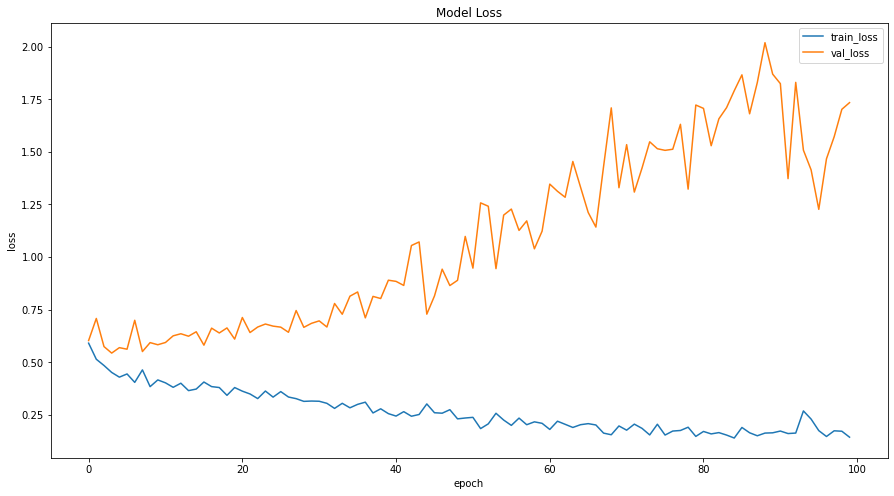

In [ ]:
# model performance across epochs
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# EVALUATING MODEL PERFORMANCE

In [ ]:
predictions = model.predict(X_test)
predict = []

for i in predictions:
    predict.append(np.argmax(i))

In [ ]:
from sklearn import metrics
y_test = np.argmax(y_test, axis=1)

f1_test = metrics.f1_score(y_test, predict)
prec = metrics.precision_score(y_test, predict)
rec = metrics.recall_score(y_test, predict)
acc = metrics.accuracy_score(y_test, predict)

print ("F1 Score: {:.4f}.".format(f1_test))
print ("Precision: {:.4f}.".format(prec))
print ("Recall: {:.4f}.".format(rec))
print ("Accuracy: {:.4f}.".format(acc))

F1 Score: 0.7294.
Precision: 0.7381.
Recall: 0.7209.
Accuracy: 0.6290.


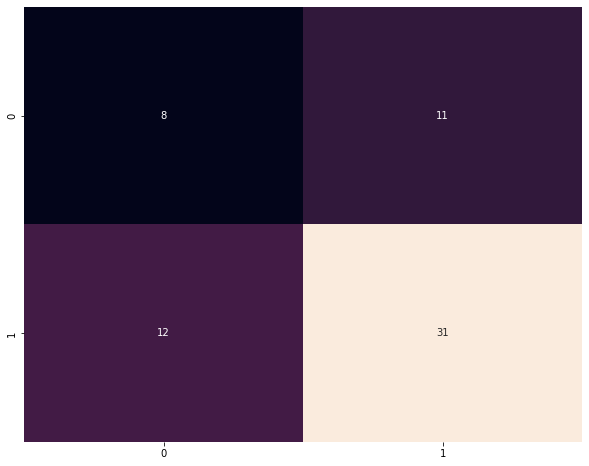

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, cbar=False)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.40      0.42      0.41        19
           1       0.74      0.72      0.73        43

    accuracy                           0.63        62
   macro avg       0.57      0.57      0.57        62
weighted avg       0.63      0.63      0.63        62



In [ ]:
# custom input
new_X = (0,1,1,1,0,4383,1508.0,128.0,360.0,1,0)
new_arr = np.asarray(new_X)
arr_reshaped = new_arr.reshape(1,-1)
prediction = model.predict(arr_reshaped)
print(prediction)
if(prediction[0][0] == 1.0):
  print("Loan Approved")
else:
  print("Loan Disapproved")

[[0. 1.]]
Loan Disapproved
